In [17]:
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np

In [18]:
# Open the file and the required data
with open('water.lammpstrj', 'r') as f:
    data = f.readlines()
n_atoms = int(data[3].strip()) # Total number of atoms in the system
# print (n_atoms)

In [19]:
coordinates = []
for l in data[1009: ]: #skipping first few ~100 frames.
    s = l.split()
    if int(s[1]) == 2: # Get only oxygen atoms
       coordinates.append([float(s[3]), float(s[4]), float(s[5])])

In [20]:
# Initialise the calculation

n_particles = len(coordinates)
n_bins = 100
box_size = 62
rcut = 30
increment = box_size / (2 * n_bins) # bin_size

In [21]:
# Helper function to calculate the distance between atoms
# keeping in mind the boundary conditions

def distance_between_points(p, q):
    distance_x = abs(p[0] - q[0])
    distance_x = min(distance_x, abs(box_size - distance_x))
    distance_y = abs(p[1] - q[1])
    distance_y = min(distance_y, abs(box_size - distance_y))
    distance_z = abs(p[2] - q[2])
    distance_z = min(distance_z, abs(box_size - distance_z))
    
    return np.lib.scimath.sqrt(distance_x**2 + distance_y**2 + distance_z**2)

In [22]:
# Loop over all the particles and find the distribution of distances

distribution = np.zeros(n_bins)
for i in range(n_particles-1):
    for j in range(i+1, n_particles):
        distance = distance_between_points(coordinates[i], coordinates[j])
        if distance < (rcut): #rcut value can be changed according to requirements
            ig = int(distance / increment)
            distribution[ig] = distribution[ig] + 2

In [23]:
# Calculate g(r) by normalising the distribution

density = n_particles/box_size**3
for j in range(n_bins):
    r1 = distribution[j]
    r2 = r1 + increment
    vol_bin = (4/3) * sp.pi * (r2**3 - r1**3)
    n_ideal = vol_bin * density
    distribution[j] = distribution[j] / n_ideal
    distribution[j] = distribution[j]  
print(distribution/100)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.59861810e-06 2.82795774e-06 0.00000000e+00
 0.00000000e+00 0.00000000e+00 8.82765923e-07 0.00000000e+00
 0.00000000e+00 1.33391440e-06 0.00000000e+00 3.34920287e-06
 3.74248190e-06 0.00000000e+00 4.45076105e-07 0.00000000e+00
 4.47974186e-07 0.00000000e+00 0.00000000e+00 0.00000000e+00
 8.96691755e-07 6.60041680e-07 7.89076307e-07 4.45712452e-07
 0.00000000e+00 4.48397040e-07 1.36056708e-06 0.00000000e+00
 4.48750028e-07 2.25562379e-07 0.00000000e+00 2.72334835e-06
 5.09085647e-06 2.24949473e-07 2.99283539e-07 4.51328464e-07
 4.49154125e-07 2.25664430e-07 4.53523956e-07 0.00000000e+00
 4.53523956e-07 7.83498609e-07 1.22286384e-07 3.37713444e-07
 0.00000000e+00 1.50731690e-07 2.25766572e-07 0.00000000e+00
 8.99927438e-07 2.26314611e-07 2.25868808e-07 1.70758711e-07
 2.79941621e-07 1.50738522e-07 0.00000000e+00 4.49964505e-07
 7.53123828e-08 4.535239

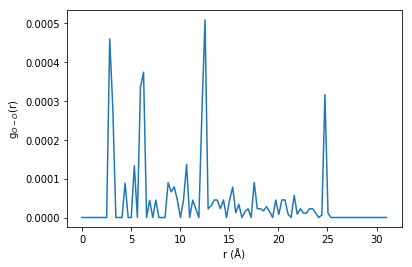

In [16]:
# for rcut = 25

radii = np.linspace(0.0, n_bins*increment, n_bins)
plt.xlabel('r (Å)')
plt.ylabel('g$_{O-O}$(r)')
plt.plot(radii, distribution)
plt.show()

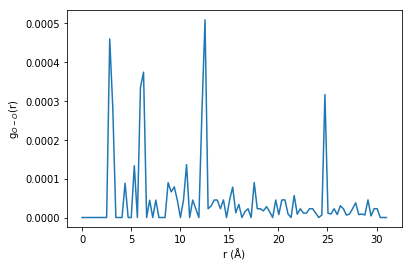

In [24]:
# for rcut = 30

radii = np.linspace(0.0, n_bins*increment, n_bins)
plt.xlabel('r (Å)')
plt.ylabel('g$_{O-O}$(r)')
plt.plot(radii, distribution)
plt.show()